# 09 - 1

In [1]:
## 순차 데이터

In [2]:
# 순차 데이터는 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터
# 지금까지 했던 데이터는 순서가 상관 없었지만 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요
# 완전 연결 신경망이나 합성곱 신경망은 기억 장치가 없어서 정방향 계산을 수행하고 나면 샘플은 버려지고 재사용하지 않음 : 피드포워드 신경망

In [3]:
# 예를 들어 A, B, C 3개의 샘플을 처리하여 O 를 출력한다고 하면
# A를 처리하고 출력된 OA 가 다시 뉴런으로 돌아가서 B 를 처리할 때 사용하여 OB 를 만듬
# 그럼 OB에는 A에 관한 정보도 들어있음, 그 후 OB 가 다시 뉴런으로 돌아가 C 를 처리할 때 사용됨
# 그렇게 출력된 OC에는 A와 B에 관한 정보가 어느 정도 포함되어 있을 것임
# 이렇게 샘플을 처리하는 한 단계를 타임스텝이라고 부름

In [4]:
# 순환 신경망에서는 층을 셀이라고 부르고 여러 개의 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표한함 또한 셀의 출력을 은닉 상태라고 부름
# 일반적으로 은닉층의 활성화 함수로는 tanh를 사용함 : -1 ~ 1 사이의 범위를 가짐

In [5]:
# 예를 들어 타임스텝 1에서 셀의 출력 h1이 타임스텝 2의 셀로 주입됨, 이 때 wh와 곱해짐, 마찬가지로 타임스텝 2에서 셀의 출력 h2가 타임스텝 3의 셀로 주입됨. 이떄도 wh와 곱해짐
# 모든 타임스텝에서 사용되는 가중치는 wb 하나임
# 타임스텝 1에서 사용되는 이전 은닉 상태 h0은 이전 타임스텝이 없기 때문에 h0은 간단하게 0으로 초기화됨

In [6]:
## 셀의 가중치와 입출력

In [7]:
# 예를 들어 입력 특성의 개수가 4개고 순환층의 뉴런이 3개라면
# wx의 크기는 4 * 3 = 12개임
# 순환층에서 다음 타임스텝에 재사용되는 은닉 상태를 위한 가중치 wh는 첫 번째 뉴런인 r1의 은닉상태가 r2, r3에도 전달되고, r2, r3도 마찬가지로 적용되므로 3 * 3 = 9개
# 각 뉴런마다 하나의 절편이 있기에 총 모델 파라미터의 개수는 12 + 9 + 3 = 24
# 순환층은 일반적으로 샘플마다 2개의 차원을 가짐, 하나의 샘플을 하나의 시퀀스라고 말함
# 시퀀스 안에는 여러 개의 아이템이 들어 있으며, 시퀀스의 길이가 바로 타임스텝의 길이가 됨

In [8]:
# 입력된 시퀀스 길이를 모두 읽어서 정보를 마지막 은닉 상태에 전달하는 느낌
# 만약 층이 여러개라면 마지막 이외의 셀은 모든 타임스텝의 은닉 상태를 출력
# 마지막 출력층은 다중 분류일 경우에는 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스
# 이진 분류일 경우에는 하나의 뉴런을 두고 시그모이드 활성화 함수 사용

# 09 - 2

In [9]:
## IMDB 리뷰 데이터셋

In [10]:
# 텍스트 자체가 신경망에 전달되는 것이 아닌 단어 당 하나의 정수 픽셀을 부여
# 정수의 크기와 중요도와는 아무 관계가 없음
# 이렇게 분리된 단어를 토큰 이라고 부름
# 토큰에 할당되는 정수 중에서는 몇 개는 특정한 용도로 예약되어 있음
# 예를 들어 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰임
# 어휘 사전에 없는 토큰이란 훈련 세트에는 있지만 테스트 세트에는 없는 단어에는 2가 부여됨

In [52]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=300)
# 이미 정수로 바꾼 데이터를 가져옴
# 전체 데이터셋에서 가장 자주 등장하는 단어 300개만 사용하기 위해 num_words의 매개변수를 300으로 지정

In [53]:
train_input.shape, test_input.shape
# IMDB 리뷰 텍스트는 길이가 제각각이므로 고정 크기의 2차원 배열보다는 리뷰마다 별도의 파이썬 리스트로 담아야 효율적으로 사용가능

((25000,), (25000,))

In [54]:
# 첫 번째 리뷰의 길이
len(train_input[0])

218

In [55]:
# 두 번째 리뷰의 길이
len(train_input[1])

189

In [56]:
# 218 단어로 이루어진 첫 번째 리뷰 출력
train_input[0]
# 어휘 사전을 300으로 지정했기에 그 사전에 없는 단어들은 전부 2로 출력됨

[1,
 14,
 22,
 16,
 43,
 2,
 2,
 2,
 2,
 65,
 2,
 2,
 66,
 2,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 2,
 112,
 50,
 2,
 2,
 9,
 35,
 2,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 2,
 2,
 39,
 4,
 172,
 2,
 2,
 17,
 2,
 38,
 13,
 2,
 4,
 192,
 50,
 16,
 6,
 147,
 2,
 19,
 14,
 22,
 4,
 2,
 2,
 2,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 2,
 38,
 76,
 15,
 13,
 2,
 4,
 22,
 17,
 2,
 17,
 12,
 16,
 2,
 18,
 2,
 5,
 62,
 2,
 12,
 8,
 2,
 8,
 106,
 5,
 4,
 2,
 2,
 16,
 2,
 66,
 2,
 33,
 4,
 130,
 12,
 16,
 38,
 2,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 2,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 2,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 2,
 15,
 256,
 4,
 2,
 7,
 2,
 5,
 2,
 36,
 71,
 43,
 2,
 2,
 26,
 2,
 2,
 46,
 7,
 4,
 2,
 2,
 13,
 104,
 88,
 4,
 2,
 15,
 297,
 98,
 32,
 2,
 56,
 26,
 141,
 6,
 194,
 2,
 18,
 4,
 226,
 22,
 21,
 134,
 2,
 26,
 2,
 5,
 144,
 30,
 2,
 18,
 51,
 36,
 28,
 224,
 92,
 25,
 104,
 4,
 226,
 65,
 16,
 38,
 2,
 88,
 12,
 16,
 283,
 5,
 16,
 2,
 113,
 103,
 

In [57]:
train_target[:20]
# 해당 리뷰가 긍정인지 부정인지 판단하는 것으로 타깃 값이 0과 1인 이진 분류 문제로 볼 수 있음

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [58]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [59]:
# 평균적인 리뷰의 길이와 가장 짧은, 긴 리뷰의 길이를 확인하기 위해 리뷰의 길이를 계산해서 넘파이 배열에 담기
import numpy as np
lengths = np.array([len(x) for x in train_input])

In [60]:
np.mean(lengths), np.median(lengths)
# 리뷰의 평균 단어 개수가 239개이고 중간값이 178이므로 이 데이터는 한쪽이 치우쳐진 느낌

(239.00925, 178.0)

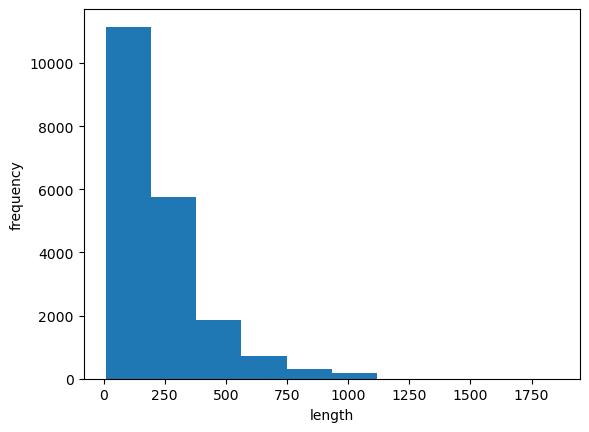

In [61]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [62]:
# 리뷰가 대부분 짧기 때문에 중간값보다 짧은 100개의 단어만 사용할 것이며, 100개의 단어보다 더 작은 리뷰들이 있기에 이런 리뷰들의 길이를 맞추기 위해 패딩을 사용하여 0 값을 넣음
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
# pad_sequences() 메서드에 maxlen 매개변수를 지정하면 이보다 긴 경우는 자르고 짧은 경우는 0으로 패딩함

In [63]:
train_seq.shape
# train_input은 파이썬 리스트였지만 길이를 100으로 맞춰서 train_seq는 2차원 배열이 되었음

(20000, 100)

In [64]:
train_seq[0], train_input[0][-10:]
# 첫 번째 데이터는 100자보다 많아서 잘렸으며 원래 데이터와 비교했을 시 샘플의 앞부분이 잘렸다는 것을 확인할 수 있음

(array([ 10,   4,  20,   9,   2,   2,   2,   5,  45,   6,   2,   2,  33,
        269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
         19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
         33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
        237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
          2,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
        151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
          2,  46,   7,  14,  20,  10,  10,   2, 158]),
 [6, 2, 46, 7, 14, 20, 10, 10, 2, 158])

In [65]:
# pad_sequences 는 기본적으로 앞부분을 자르지만 만약 뒷부분을 자르고 싶다면 truncating 매개변수 값을 pre가 아닌 post로 바꾸면 됨

In [66]:
train_seq[5]
# 여섯 번째 데이터를 보면 100자보다 짧았던 리뷰라서 앞 부분이 0 패딩으로 채워진 것을 확인 할 수 있음

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2,   2,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94,   2,   2,   2,   2,  11, 190,  24,   2,   2,   7,  94, 205,
         2,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2])

In [67]:
val_seq = pad_sequences(val_input, maxlen=100)

In [27]:
## 순환 신경망 만들기

In [28]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,300)))
model.add(keras.layers.Dense(1, activation='sigmoid'))
# SimpleRNN의 첫 번째 매개변수는 사용할 뉴런의 개수, input_shape에서는 입력 차원 지정
# 입력 차윈이 100,300인 것은 앞서 샘플의 길이를 100으로 지정했기 때문
# 순환층의 활성화 함수는 대부분 tanh를 사용하며 기본값으로 적용되어 있음
# 입력 차원의 300이란 숫자에 대해서 살펴보면
# train_seq와 val_seq는 정수로 변환되어 있기 때문에 정수가 크면 활성화 출력도 커짐
# 하지만 정수간에는 아무 관련이 없기에 크기 속성을 없애고 각 정수를 고유하게 표현해야함
# 그러기 위해서 원-핫 인코딩을 사용할 예정이며
# 여기서는 300개의 단어만을 사용하기로 했으므로 고유한 단어는 300개이고 이를 원-핫 인코딩으로 표현하려면 배열의 길이가 300이어야함

In [29]:
train_oh = keras.utils.to_categorical(train_seq)
train_oh.shape

(20000, 100, 300)

In [30]:
# 제대로 잘 변환 되었는가 테스트
train_oh[0][0][:12], np.sum(train_oh[0][0])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32), 1.0)

In [31]:
val_oh = keras.utils.to_categorical(val_seq)

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 2472      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2481 (9.69 KB)
Trainable params: 2481 (9.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# 순환층의 마지막 타임스텝은 은닉 상태만 출력하기 때문에 뉴런 개수와 같은 8개
# 파라미터 개수를 생각해보면 300차원의 토큰이 뉴런 8개와 연결되기 때문에 300 * 8 인 2400
# 순환층의 은닉 상태는 다른 순환층의 뉴런과 연결되므로 8 * 8 인 64
# 마지막으로 각 뉴런마다 절편이 하나씩 있으므로 8
# 2400 + 64 + 8 = 2472 라는 결과가 나옴

In [34]:
## 순환 신경망 훈련하기

In [35]:
# # RMSproop의 기본 학습률은 0.001이므로 여기서는 0.0001로 지정하기 위해 따로 객체를 만듬
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100


313/313 [==============================] - 6s 14ms/step - loss: 0.7077 - accuracy: 0.5106 - val_loss: 0.7016 - val_accuracy: 0.5238
Epoch 2/100
 11/313 [>.............................] - ETA: 3s - loss: 0.6966 - accuracy: 0.5085

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 4s 13ms/step - loss: 0.6962 - accuracy: 0.5282 - val_loss: 0.6945 - val_accuracy: 0.5350
Epoch 3/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6867 - accuracy: 0.5501 - val_loss: 0.6809 - val_accuracy: 0.5718
Epoch 4/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6666 - accuracy: 0.5979 - val_loss: 0.6632 - val_accuracy: 0.6068
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6504 - accuracy: 0.6267 - val_loss: 0.6485 - val_accuracy: 0.6312
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6350 - accuracy: 0.6500 - val_loss: 0.6354 - val_accuracy: 0.6496
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6206 - accuracy: 0.6694 - val_loss: 0.6257 - val_accuracy: 0.6600
Epoch 8/100
313/313 [==============================] - 4s 13ms/step - loss: 0.6071 - accuracy: 0.6850 - val_loss: 0.6099 - val_accuracy: 0.6760
Epoc

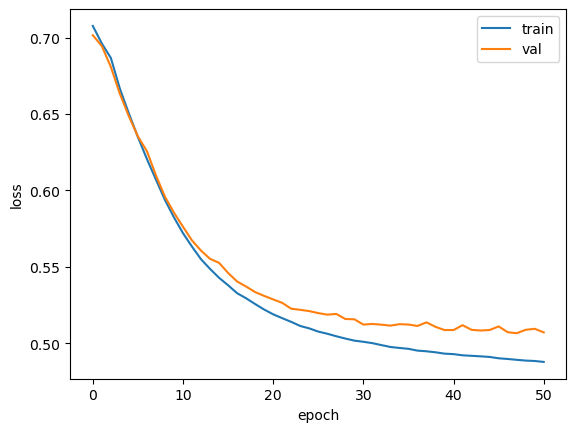

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [68]:
# 여기서 이 작업을 하기위해서 토큰 한개 마다 원핫인코딩을 해서 입력 데이터가 너무 커짐
train_seq.nbytes, train_oh.nbytes

(8000000, 2400000000)

In [69]:
## 단어 임베딩을 사용하기

In [70]:
# 단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾸어 줌
# keras.layers의 패키지 아래 Embedding 클래스로 임베딩 기능을 제공
# 장점으로는 입력으로 정수 데이터를 받음으로 메모리를 훨씬 효율적으로 사용할 수 있다는 것
# 앞에서 한 원-핫 인코딩은 크기의 샘플이 (100,300) 으로 커졌지만
# 임베딩은 샘플을 (100,20) 으로 늘림으로써 훨씬 작은 크기로도 단어를 잘 표현 가능

In [71]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(300, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
# Embedding의 첫 번째 매개변수 300 은 어휘 사전의 크기, 두 번째 매개변수 16은 임베딩 벡터의 크기, 세 번째 매개변수는 입력 시퀀스의 길이

In [72]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           4800      
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 5009 (19.57 KB)
Trainable params: 5009 (19.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
# 임베딩 층은 (100,) 크기를 입력받아 (100,16)크기의 출력을 만듬
# Embedding 클래스는 300개의 토큰을 크기가 16인 벡터로 변경해서 총 300 * 16 = 4800
# 그 후에 벡터의 크기인 16과 순환층의 뉴런 개수 8로 16 * 8 = 128
# 그리고 각 은닉 상태 8개에 곱해지는 가중치 8개로 8 * 8 = 64
# 마지막으로 각 뉴런마다 절편이 있으므로 8
# 총 128 + 64 + 8 이므로 200
# 마지막 Dense 층의 가중치 개수는 9개

In [74]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss='binary_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 12ms/step - loss: 0.6873 - accuracy: 0.5449 - val_loss: 0.6661 - val_accuracy: 0.6002
Epoch 2/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6356 - accuracy: 0.6615 - val_loss: 0.6177 - val_accuracy: 0.6918
Epoch 3/100
313/313 [==============================] - 4s 12ms/step - loss: 0.6051 - accuracy: 0.7023 - val_loss: 0.6043 - val_accuracy: 0.7010
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5871 - accuracy: 0.7186 - val_loss: 0.5831 - val_accuracy: 0.7222
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5713 - accuracy: 0.7345 - val_loss: 0.5705 - val_accuracy: 0.7272
Epoch 6/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5600 - accuracy: 0.7420 - val_loss: 0.5609 - val_accuracy: 0.7398
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5503 - accuracy: 0.7473 - val_loss: 0.5536 - val_accuracy:

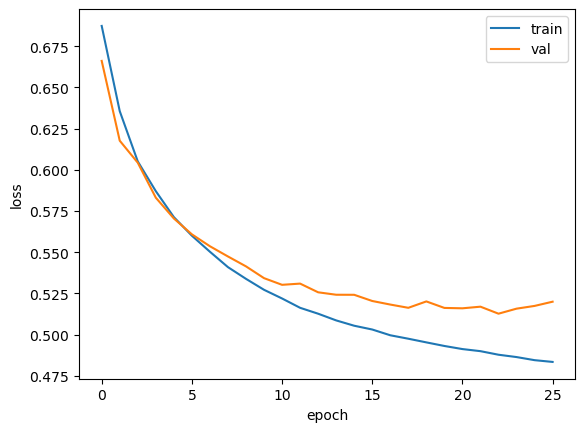

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [76]:
# 검증 손실이 더 감소하지 않아 훈련이 적절히 조기 종료 되었으나 훈련 손실은 계속 감소함

# 09 - 3

In [77]:
# 일반적으로 기본 순환층은 시퀀스가 길수록 은닉 상태에 담긴 정보가 점차 희석되기 때문에 긴 시퀀스를 학습하기 힘듬

In [78]:
## LSTM 구조

In [ ]:
# LSTM = Long Short-Term Memory의 약자
# 단기 기억을 오래 기억하기 위해 고안
# 은닉 상태는 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만듬, 이 때 기본 순환층과는 달리 시그모이드 활성화 함수 사용
# 또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만듬